# Task 2: Perform Data Analysis of Air Pollution due to PM2.5 with respect to diffirent climatic conditions.

No: row number

year: year of data in this row

month: month of data in this row 

day: day of data in this row

hour: hour of data in this row

pm2.5: PM2.5 concentration (ug/m^3)

DEWP: Dew Point (â„ƒ)

TEMP: Temperature (â„ƒ)

PRES: Pressure (hPa)

cbwd: Combined wind direction

Iws: Cumulated wind speed (m/s)

Is: Cumulated hours of snow

Ir: Cumulated hours of rain

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\vedan\OneDrive\Desktop\PRSA_data_2010.1.1-2014.12.31.csv"
df = pd.read_csv(path)

Finding number of rows in dataSet

In [3]:
df.shape

(43824, 13)

In [4]:
len(df)

43824

In [5]:
df.sample(5)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
36368,36369,2014,2,24,8,329.0,-5,2.0,1029.0,cv,0.89,0,0
39149,39150,2014,6,20,5,48.0,18,19.0,1007.0,SE,1.79,0,5
42929,42930,2014,11,24,17,31.0,-9,7.0,1026.0,SE,10.28,0,0
1838,1839,2010,3,18,14,227.0,-2,4.0,1018.0,cv,0.89,0,0
19330,19331,2012,3,16,10,286.0,4,6.0,1014.0,NW,1.79,0,0


In [6]:
df.drop('No',axis=1,inplace=True)

In [7]:
df.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [8]:
#adding date column
date=df[['year','month','day']].apply(lambda x: '-'.join(x.values.astype(str)),axis='columns')

df.insert(5,'date',date)
df['date']=pd.to_datetime(df['date'])

In [9]:
print("Total Null Values:",df.isnull().sum().sum())
df.isnull().sum()
# 2067 null entries in 'pm2.5' coulmn

Total Null Values: 2067


year        0
month       0
day         0
hour        0
pm2.5    2067
date        0
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [10]:
df1 = df.fillna(value=df['pm2.5'].mean())
df1.head(5)

,year,month,day,hour,pm2.5,date,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,98.613215,2010-01-01,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,98.613215,2010-01-01,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,98.613215,2010-01-01,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,98.613215,2010-01-01,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,98.613215,2010-01-01,-20,-12.0,1018.0,NW,12.97,0,0


# Exploratory Data Analysis

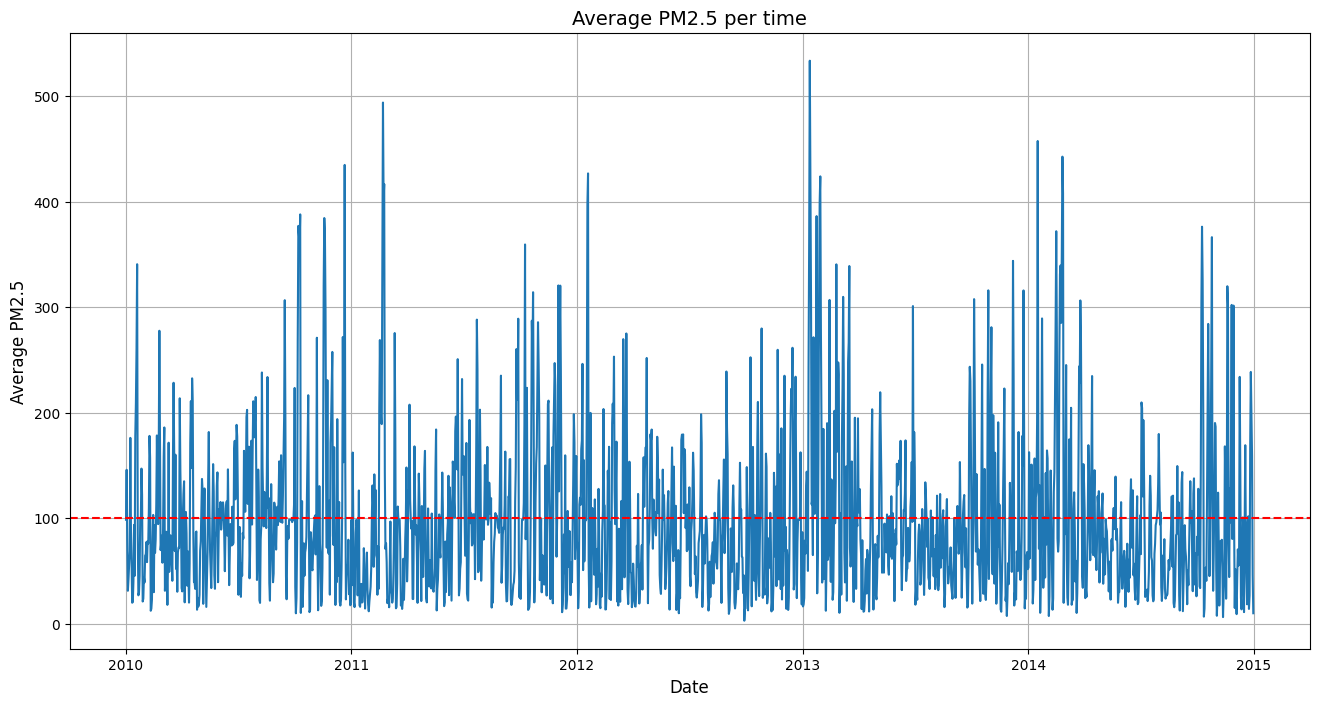

In [11]:
date = df1.groupby('date')['pm2.5'].mean()


plt.figure(figsize= [16, 8])
sns.lineplot(x = date.index, y = date)
plt.axhline(100, ls= '--', color= 'red')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 per time', fontsize = 14)
plt.grid()
plt.show()

In [12]:
df1['cbwd'].describe()
# sum(df1['cbwd']=='SE')

count     43824
unique        4
top          SE
freq      15290
Name: cbwd, dtype: object

In [13]:
cbwd_valueCounts = df1['cbwd'].value_counts()
print(cbwd_valueCounts)

cbwd
SE    15290
NW    14150
cv     9387
NE     4997
Name: count, dtype: int64


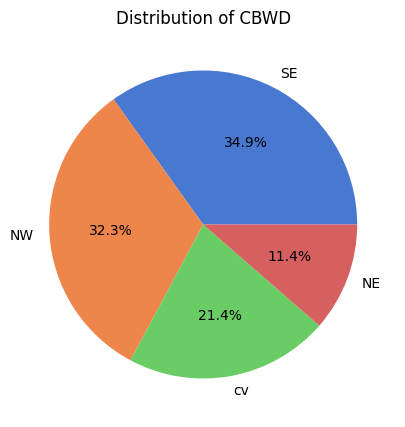

Report Shows the Maximum Combined Wind Direction (2010-2014) was of South-East SE Direction 34.9%


In [14]:
cbwd_valueCounts = df1['cbwd'].value_counts()
plt.figure(figsize=(5,5))
labels = ['SE','NW','cv','NE']
palette = sns.color_palette("muted")
# palette = deep, muted, bright, pastel, dark, colorblind
plt.pie(x=cbwd_valueCounts,colors=palette,labels=labels,autopct='%1.1f%%')
plt.title("Distribution of CBWD")
plt.show()
print("""Report Shows the Maximum Combined Wind Direction (2010-2014) was of South-East SE Direction 34.9%""")

In [15]:
# check the data of how many years
df1['year'].value_counts()

year
2012    8784
2010    8760
2011    8760
2013    8760
2014    8760
Name: count, dtype: int64

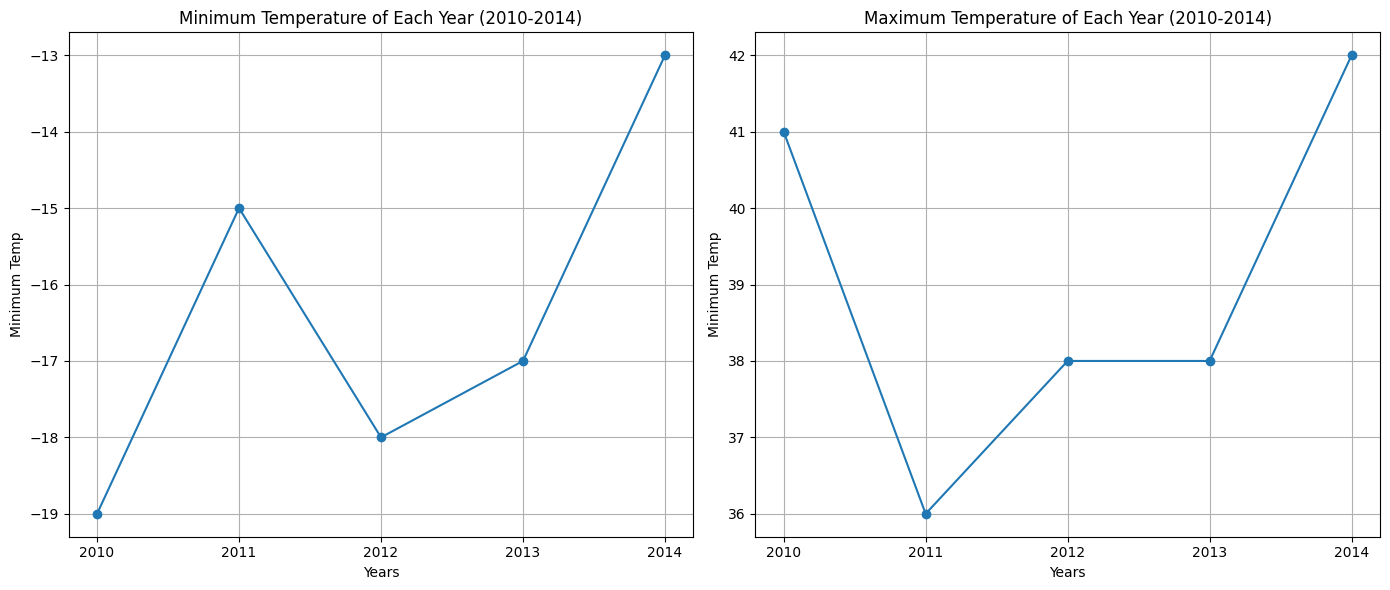

In [16]:
# lets find minimum temp of each year
year = np.arange(2010,2015)
min_temps = df1.groupby('year')['TEMP'].min().reset_index()
max_temps = df1.groupby('year')['TEMP'].max().reset_index()

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(year,min_temps['TEMP'],marker='o')
axs[0].set_title('Minimum Temperature of Each Year (2010-2014)')
axs[0].set_xlabel("Years")
axs[0].set_ylabel("Minimum Temp")
axs[0].set_xticks(year)
axs[0].grid(True)



axs[1].plot(year,max_temps['TEMP'],marker='o')
axs[1].set_title('Maximum Temperature of Each Year (2010-2014)')
axs[1].set_xlabel("Years")
axs[1].set_ylabel("Minimum Temp")
axs[1].set_xticks(year)
axs[1].grid(True)

plt.tight_layout()
plt.show()


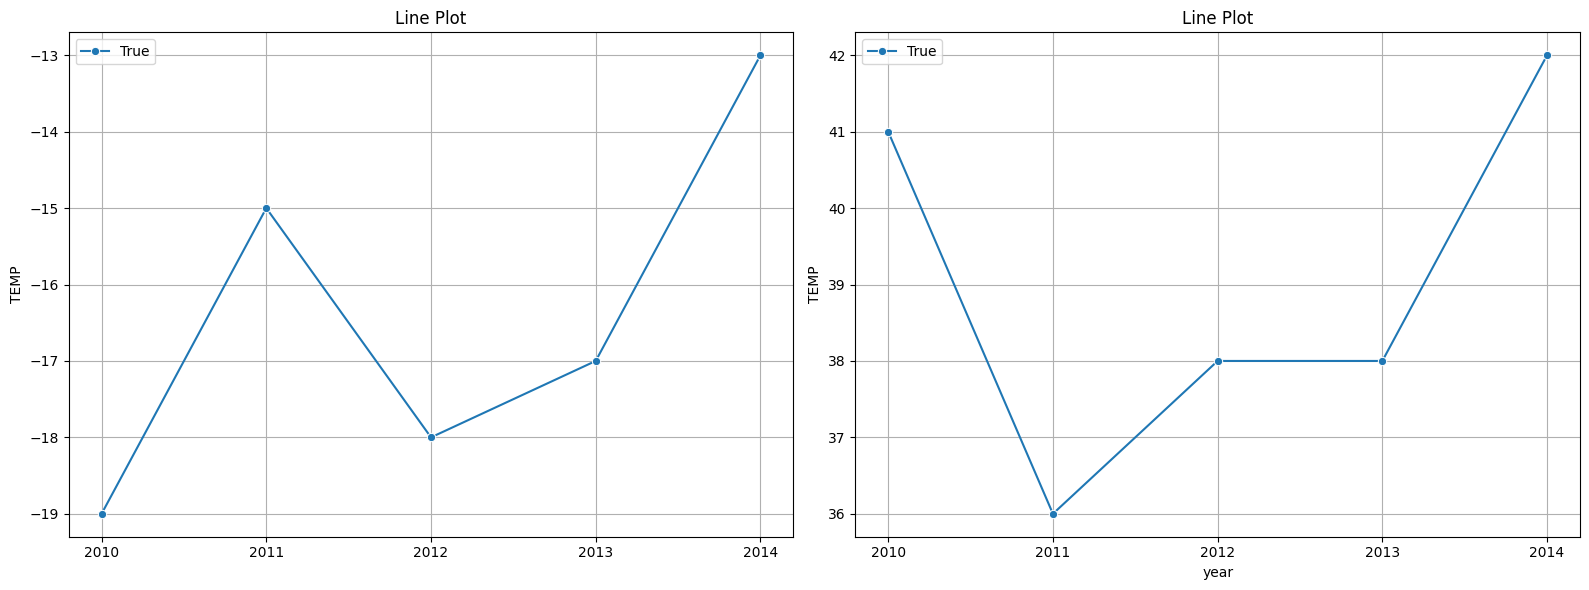

In [17]:
# ALTERNATE Way using SEABORN library to show plots

year = np.arange(2010,2015)
min_temps = df1.groupby('year')['TEMP'].min().reset_index()
max_temps = df1.groupby('year')['TEMP'].max().reset_index()

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.lineplot(data=min_temps, x=year, y='TEMP',markers=True,hue=True,style=True)
plt.title('Line Plot')
plt.xticks(year)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(data=max_temps, x='year', y='TEMP', markers=True, style=True)
plt.title('Line Plot')
plt.grid(True)
plt.xticks(year)



plt.tight_layout()
plt.show()

In [18]:
df1.sample(5)

,year,month,day,hour,pm2.5,date,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
2291,2010,4,6,11,16.0,2010-04-06,-17,13.0,1027.0,NW,62.13,0,0
24970,2012,11,6,10,65.0,2012-11-06,-2,8.0,1023.0,NW,6.71,0,0
25198,2012,11,15,22,137.0,2012-11-15,0,1.0,1025.0,cv,0.89,0,3
38414,2014,5,20,14,14.0,2014-05-20,6,31.0,1003.0,cv,2.68,0,0
20693,2012,5,12,5,123.0,2012-05-12,13,15.0,1011.0,NW,1.79,0,7


In [19]:
# Pressure Data of JAN each Day(mean) of 2012
new_df = df1[(df1['year'] == 2012) & (df1['month'] == 1)]
new_df.head()

,year,month,day,hour,pm2.5,date,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
17520,2012,1,1,0,275.0,2012-01-01,-12,-8.0,1030.0,NE,0.89,0,0
17521,2012,1,1,1,303.0,2012-01-01,-13,-10.0,1031.0,NW,1.79,0,0
17522,2012,1,1,2,215.0,2012-01-01,-13,-9.0,1032.0,NW,3.58,0,0
17523,2012,1,1,3,222.0,2012-01-01,-13,-9.0,1033.0,NW,6.71,0,0
17524,2012,1,1,4,85.0,2012-01-01,-13,-4.0,1033.0,NE,4.92,0,0


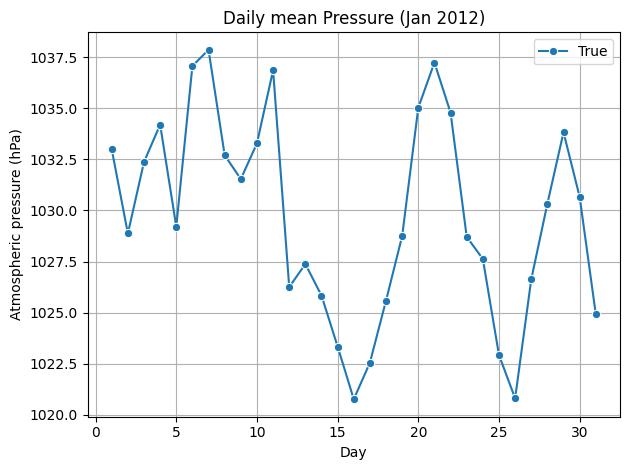

In [20]:
daily_mean_pres = new_df.groupby([ 'day'])['PRES'].mean().reset_index()
daily_mean_pres.rename(columns={'PRES': 'mean_PRES'}, inplace=True)
# print(daily_mean_pres)
plt.title("Daily mean Pressure (Jan 2012)")
plt.xlabel('Day')
plt.ylabel("Atmospheric pressure (hPa)")
sns.lineplot(data = daily_mean_pres, x= daily_mean_pres['day'],y = daily_mean_pres['mean_PRES'],markers='o',style=True)
plt.grid(which='both')
plt.tight_layout()

plt.show()

#### In summary, a mean atmospheric pressure above 1020 hPa over a month is indicative of High-pressure systems that bring stable, dry, and generally pleasant weather, often associated with specific geographical and seasonal patterns.

---

## Monthly Mean Pressure of Each Month Of Years

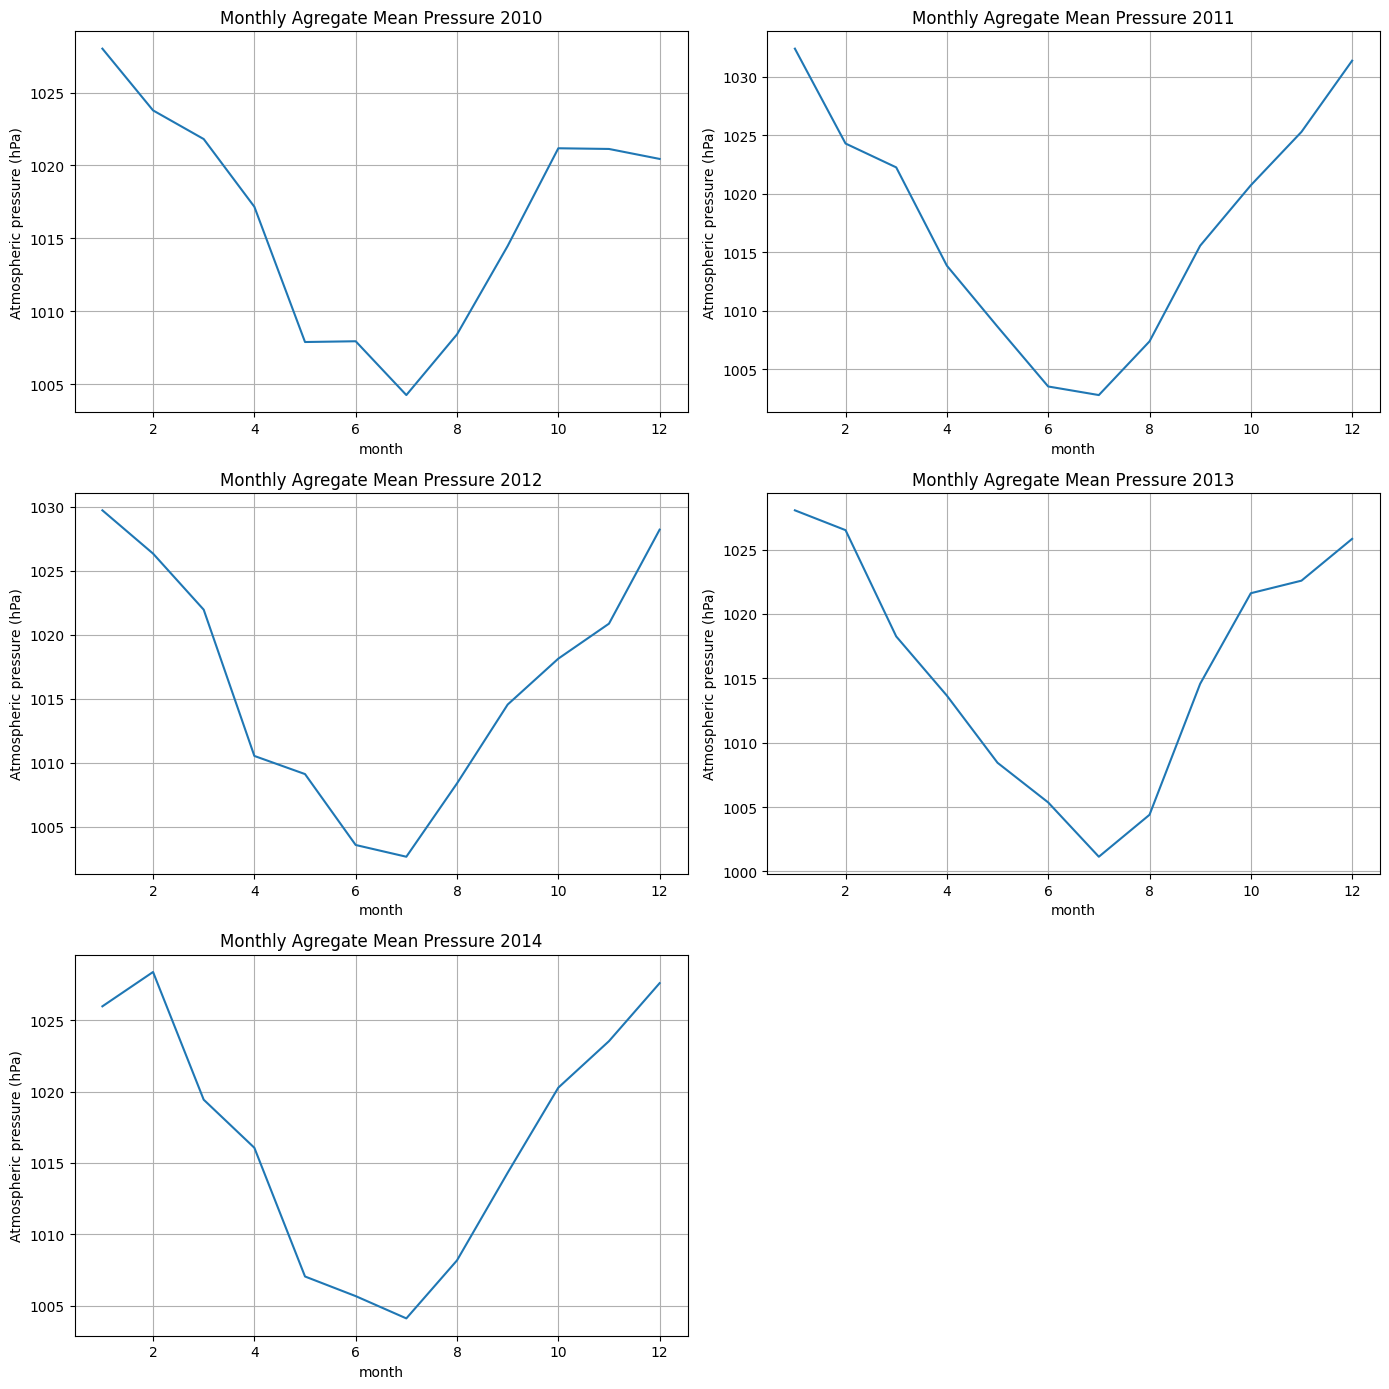

In [21]:
df_monthly_2010 = df1[df1['year']==2010].groupby('month')['PRES'].mean().reset_index()
df_monthly_2011 = df1[df1['year']==2011].groupby('month')['PRES'].mean().reset_index()
df_monthly_2012 = df1[df1['year']==2012].groupby('month')['PRES'].mean().reset_index()
df_monthly_2013 = df1[df1['year']==2013].groupby('month')['PRES'].mean().reset_index()
df_monthly_2014 = df1[df1['year']==2014].groupby('month')['PRES'].mean().reset_index()


plt.figure(figsize=(14,14))

plt.subplot(3,2,1)
plt.plot(df_monthly_2010['month'],df_monthly_2010['PRES'])
plt.title("Monthly Agregate Mean Pressure 2010")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()


plt.subplot(3,2,2)
plt.plot(df_monthly_2011['month'],df_monthly_2011['PRES'])
plt.title("Monthly Agregate Mean Pressure 2011")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()


plt.subplot(3,2,3)
plt.plot(df_monthly_2012['month'],df_monthly_2012['PRES'])
plt.title("Monthly Agregate Mean Pressure 2012")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()

plt.subplot(3,2,4)
plt.plot(df_monthly_2013['month'],df_monthly_2013['PRES'])
plt.title("Monthly Agregate Mean Pressure 2013")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()

plt.subplot(3,2,5)
plt.plot(df_monthly_2014['month'],df_monthly_2014['PRES'])
plt.title("Monthly Agregate Mean Pressure 2014")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()


plt.tight_layout()
plt.show()

All year report shows that 7th month has lowest pressure each yr  (more possibility to rain, distorted weather)

#### Visualizing All Year Agregate Mean Pressure In single Garph

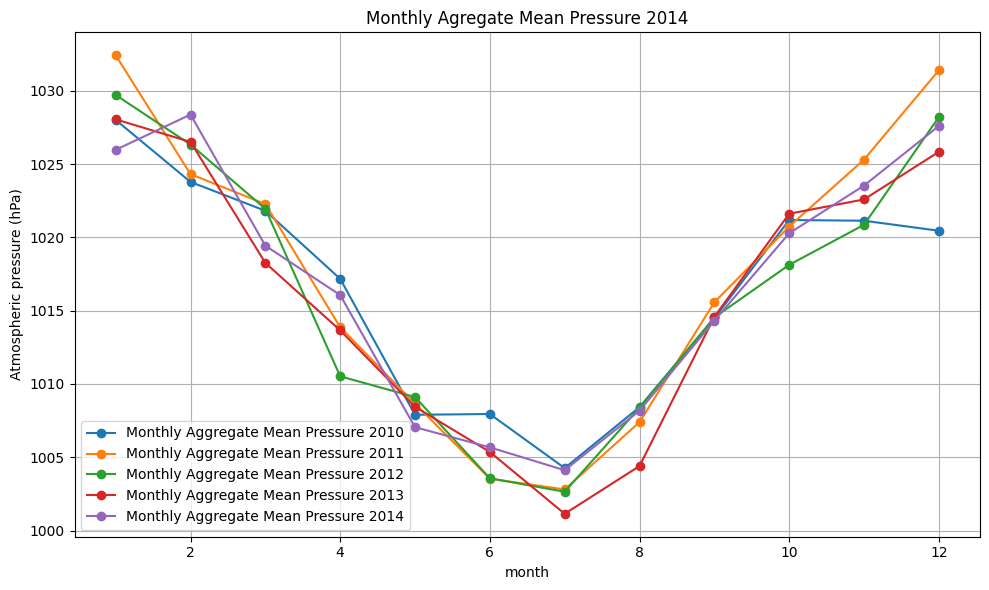

In [54]:
df_monthly_2010 = df1[df1['year']==2010].groupby('month')['PRES'].mean().reset_index()
df_monthly_2011 = df1[df1['year']==2011].groupby('month')['PRES'].mean().reset_index()
df_monthly_2012 = df1[df1['year']==2012].groupby('month')['PRES'].mean().reset_index()
df_monthly_2013 = df1[df1['year']==2013].groupby('month')['PRES'].mean().reset_index()
df_monthly_2014 = df1[df1['year']==2014].groupby('month')['PRES'].mean().reset_index()


plt.figure(figsize=(10,6))

plt.plot(df_monthly_2010['month'],df_monthly_2010['PRES'], marker='o',label='Monthly Aggregate Mean Pressure 2010')
plt.title("Monthly Agregate Mean Pressure 2010")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()


plt.plot(df_monthly_2011['month'],df_monthly_2011['PRES'], marker='o',label='Monthly Aggregate Mean Pressure 2011')
plt.title("Monthly Agregate Mean Pressure 2011")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()


plt.plot(df_monthly_2012['month'],df_monthly_2012['PRES'], marker='o',label='Monthly Aggregate Mean Pressure 2012')
plt.title("Monthly Agregate Mean Pressure 2012")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()

plt.plot(df_monthly_2013['month'],df_monthly_2013['PRES'], marker='o',label='Monthly Aggregate Mean Pressure 2013')
plt.title("Monthly Agregate Mean Pressure 2013")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()

plt.plot(df_monthly_2014['month'],df_monthly_2014['PRES'], marker='o',label='Monthly Aggregate Mean Pressure 2014')
plt.title("Monthly Agregate Mean Pressure 2014")
plt.xlabel('month')
plt.ylabel("Atmospheric pressure (hPa)")
plt.grid()

plt.legend()
plt.tight_layout()
plt.show()

## Heatmap

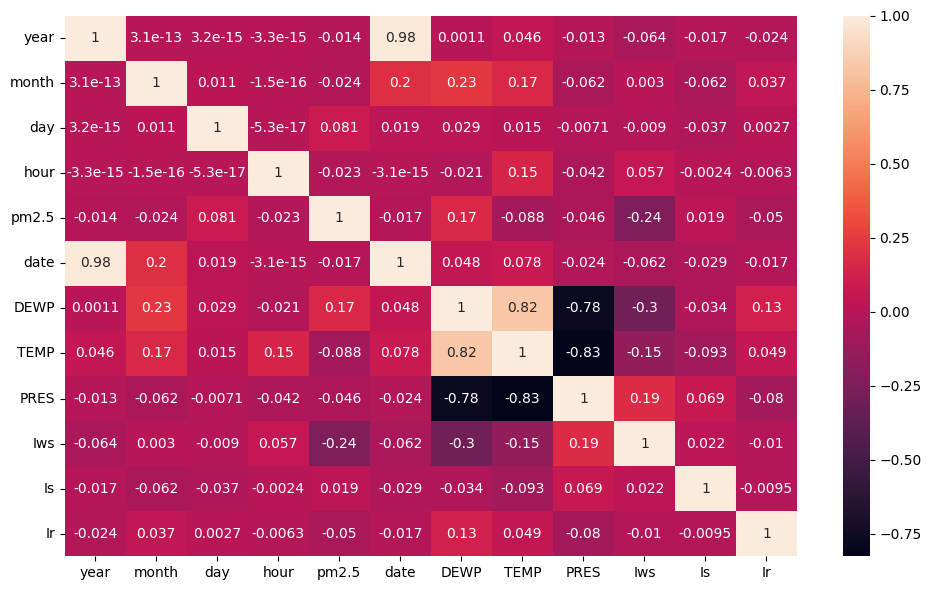

In [23]:
df2 = df1.drop('cbwd', axis=1)
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),annot=True)
plt.tight_layout()
plt.show()

In [61]:
#Normalization of quantitaitve features
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()
columns_to_scale=['DEWP','TEMP','PRES','Iws']
df2[columns_to_scale]=sts.fit_transform(df2[columns_to_scale])

In [62]:
X=df2.drop(['year','month','hour','day','date','pm2.5','Is','Ir'],axis=1)
y=df2['pm2.5']

In [63]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
grid=GridSearchCV(ridge,params,cv=10,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

print("Best value for lambda : ",grid.best_params_)
print("Best score for cost function: ", grid.best_score_)

Best value for lambda :  {'alpha': 1}
Best score for cost function:  -6383.488459306186


In [66]:
best_ridge=Ridge(alpha=1)
best_ridge.fit(X_train,y_train)
y_pred1=best_ridge.predict(X_test)

C:\Users\vedan\AppData\Local\Temp\ipykernel_84140\575983240.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred1-y_test)


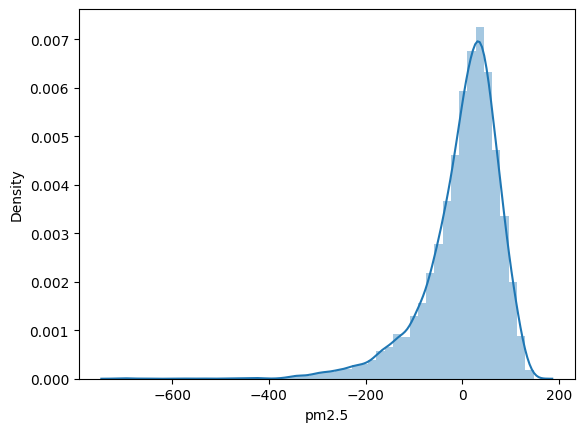

In [68]:
sns.distplot(y_pred1-y_test)
plt.show()

In [69]:
rf=RandomForestRegressor()
params={
    'max_features': ['log2'],
    'n_estimators': [300,1000]}
grid= GridSearchCV(estimator = rf, param_grid = params, 
                          cv = 10, verbose = 2)
grid.fit(X_train,y_train)
print("Best value for lambda : ",grid.best_params_)
print("Best score for cost function: ", grid.best_score_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] END ................max_features=log2, n_estimators=300; total time=  18.3s
[CV] END ................max_features=log2, n_estimators=300; total time=  15.9s
[CV] END ................max_features=log2, n_estimators=300; total time=  16.4s
[CV] END ................max_features=log2, n_estimators=300; total time=  15.6s
[CV] END ................max_features=log2, n_estimators=300; total time=  15.6s
[CV] END ................max_features=log2, n_estimators=300; total time=  15.5s
[CV] END ................max_features=log2, n_estimators=300; total time=  15.4s
[CV] END ................max_features=log2, n_estimators=300; total time=  15.2s
[CV] END ................max_features=log2, n_estimators=300; total time=  15.7s
[CV] END ................max_features=log2, n_estimators=300; total time=  15.7s
[CV] END ...............max_features=log2, n_estimators=1000; total time= 1.1min
[CV] END ...............max_features=log2, n_est

In [72]:
best_rf = grid.best_estimator_
y_pred2 = best_rf.predict(X_test)

In [73]:
print('Root Mean Squared Error of Ridge Regressor is ',mean_squared_error(y_pred1,y_test,squared=False))
print('Root Mean Squared Error of random Forest Regressor is ',mean_squared_error(y_pred2,y_test,squared=False))

Root Mean Squared Error of Ridge Regressor is  78.91289989300228
Root Mean Squared Error of random Forest Regressor is  70.85771350920723


C:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\vedan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


---

## Author : Vedant Ganesh Badukale
Indian institute Of Information Technology